In [1]:
import sys
sys.path.append('../src')
from param_estimator import ParamEstimator
import numpy as np

In [2]:
max_i = 30
num_trials = 100

err_alpha = np.zeros((max_i,num_trials))
est_alpha = np.zeros((max_i,num_trials))
err_beta = np.zeros((max_i,num_trials))
est_beta = np.zeros((max_i,num_trials))
err_sig_eps = np.zeros((max_i,num_trials))
est_sig_eps = np.zeros((max_i,num_trials))
err_p_eps = np.zeros((max_i,num_trials))
est_p_eps = np.zeros((max_i,num_trials))

pe = ParamEstimator(gamma_0=5, alpha=0.01, beta=4, sig_eps=1, p_eps=0.5)
for i in range(1,max_i):
    N=2*i+1
    for t in range(num_trials):
        pe.simulate(r=0.05, sig=0.2, mu=0.1, N=N)
        pe.estimate(est_alpha_beta=False)
        est_alpha[i][t] = pe.alpha_hat
        est_beta[i][t] = pe.beta_hat
        est_sig_eps[i][t] = pe.sig_eps_hat
        est_p_eps[i][t] = pe.p_eps_hat
        err_alpha[i][t], err_beta[i][t], err_p_eps[i][t], err_sig_eps[i][t] = pe.error()

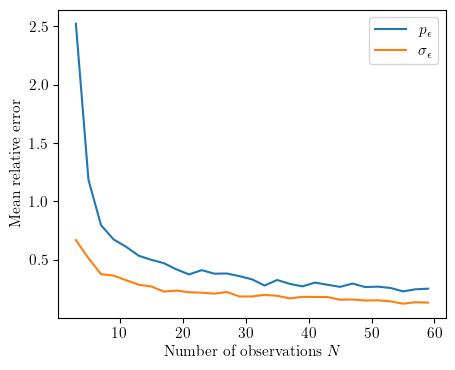

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import pyplot

mpl.rcParams.update({
        "font.family": "serif",
        "font.size": 11,
        'figure.figsize': (5,4),
        "text.usetex": True
        })

fig, ax = plt.subplots()
ax.plot([2*i+1 for i in range(1,max_i)], [err_p_eps[i].mean() for i in range(1,max_i)], label=r'$p_\epsilon$')
ax.plot([2*i+1 for i in range(1,max_i)], [err_sig_eps[i].mean() for i in range(1,max_i)], label=r'$\sigma_\epsilon$')
ax.set_xlabel('Number of observations $N$')
ax.set_ylabel('Mean relative error')
# ax.set_yscale('log')
ax.legend()
pyplot.savefig('../output/figures/param_estimation.pdf', bbox_inches='tight')